# Row Reduction and LU decomposition
LU is another decomposition underlying data-science algorithms, including least-square model fitting and the matrix inverse.

Firstly, before moving to LU decomposition, we must learn about systems of equations, row reduction, and Gaussian elimination. We will also learn about echelon matrices and permutation matrices along the way.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Systems of Equations
the following is a system of one equation:

$2x = 8$

Various mathematical manipulations can be done to an equation, as long as it is done to both sides. The following equation is not the same as the previous, but they are related to each other by simple manipulations. More importantly, the solution of one is a solution to the other.

$5(2x-3) = 5(8-3)$

Now here is a system of two equations:

$x = 4-y$<br>
$y = x/2+2$

In this system of equations, it's impossible to solve for unique values of $x$ and $y$ from either of those equations alone. Instead, you need to consider both equations simultaneously to derive the solution.

An important feature of a system of equations is that you can add or subtract individual equations from each other.

Here we've added two times the second equation to the first, and subtracted the first original equation from the second.

$x+(2y)=4-y+(x+4)$<br>
$y-(x)=x/2+2-(4-y)$

Scalar multiplying equations and adding them to other equations made the solution to the system easier to find. Again, the modulated and the original systems are not the same equations, but their solutions are the same because the two systems are linked by a series of linear operations.

### Converting Equations into Matrices
Converting systems of equations into a matrix-vector equation is used to solve systems of equations, and it's used to set up the formula for the general linear model in statistics.

Firstly, we organize the equations so that the constants are on the right-hand side of the equations. The constants are the numbers that are unattached to the variables (sometimes called *intercepts* or *offsets*). The variables and their multiplying coefficients are on the left-hand side of the equation, in the same order. ($x$ term first, then the $y$ ,and so on).

The following equations form the system of equations we've been working with:

$x+y=4$<br>
$-x/2+y=2$

Second, separate the coefficients into a matrix with one row per equation. The variables are placed into a column vector that right-multiplies the coefficients matrix, and the constants are placed into a column vector on the right-hand side of the equation.

$\begin{bmatrix}1&1\\ -1/2&1\end{bmatrix}\begin{bmatrix}x\\ y\end{bmatrix} = \begin{bmatrix}4\\ 2\end{bmatrix}$

The system of equations is converted into a matrix equation. We can refer to this equation as $\mathbf{A}x=b$, where $\mathbf{A}$ is the matrix of coefficients, $x$ is a vector of unknown variables to solve for, and $b$ is a vector of constants.

## Working with Matrix Equations
Matrix equations can be manipulated just like normal equations, including adding, multiplying, transposing, etc. As long as the manipulations are valid (matrix sizes match for addition) and all manipulations affect both sides of the equation.

The following progression of equations is valid:

$\mathbf{A}x=b$<br>
$v+\mathbf{A}x=v+b$<br>
$(v+\mathbf{A}x)^T=(v+b)^T$

The main difference between working with matrix equations versus scalar equations is that because matrix multiplication is side-dependent, you must multiply matrices in the same way on both sides of the equation.

The following progression of equations is valid:

$\mathbf{AX} = \mathbf{B}$<br>
$\mathbf{CAX} =\mathbf{CB}$

$\mathbf{C}$ premultiplies both sides of the equation. In contrast, the following progression is not valid.

$\mathbf{AX}=\mathbf{B}$<br>
$\mathbf{AXC}=\mathbf{CB}$

The problem here is that $\mathbf{C}$ post-multiplies on the left-hand side, but pre-multiplies on the right-hand side. There are exceptional cases where this is valid (if $\mathbf{C}$ is $\mathbf{I}$ or $\mathbf{0}$), but in general, that progression is not valid.

In [3]:
#to illustrate the importance of order in matrix equation manipulation
A = np.random.randn(4,4)
B = np.random.randn(4,4)

res1 = np.linalg.inv(A)@B
res2 = B@np.linalg.inv(A)

print(A@res1-B,A@res2-B)

# we can see only res1 gives us a zeros matrix, hence we can see 
# matrix multiplication is not commutative.

[[-2.22044605e-16  0.00000000e+00  3.33066907e-16  1.11022302e-16]
 [ 2.22044605e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.77555756e-17  2.77555756e-17  3.33066907e-16  5.55111512e-17]
 [-6.93889390e-17  0.00000000e+00  0.00000000e+00  1.11022302e-16]] [[-2.34412359  2.1065561   4.01448425  0.25650958]
 [ 2.28379776 -0.09797198 -4.18356671 -0.54966976]
 [-2.60026089  1.14609922  3.47782603 -0.73781471]
 [-3.04336147  0.77189926  6.19251633 -1.03573046]]


## Row Reduction
*Row Reduction* means iteratively applying two operations- scalar multiplication and addition- to rows of a matrix. Row reduction relies on the same principle as adding equations to other equations within a system.

**The goal of row reduction is to transform a dense matrix into an upper triangular matrix**

Here is an example:<br>
$\begin{bmatrix}2&3\\ -2&2\end{bmatrix} \underrightarrow{R_1+R_2} \begin{bmatrix}2&3\\0&5\end{bmatrix}$

The upper triangular matrix that results from row reduction is called the *echelon form* of the matrix.

Formally, a matrix is in echelon form if:
1. The left-most non-zero number in a row (called the *pivot*) is to the right of the pivot of the rows above
2. Any rows of all zeros are below rows containing non-zeros

Similar to manipulating equations in a system, the matrix *after* row reduction is different from the matrix *before* row reduction. However, the two matrices are linked by a linear transform. And because linear transforms can be represented by matrices, we can use matrix multiplication to express row reduction:

$\begin{bmatrix}1&0\\1&1\end{bmatrix}\begin{bmatrix}2&3\\ -2&2\end{bmatrix}=\begin{bmatrix}2&3\\0&5\end{bmatrix}$

We will call that matrix $\mathbf{L}^{-1}$ (important for LU decomposition). Thus, in the expression $(\mathbf{L}^{-1}\mathbf{A}=\mathbf{U})$, $\mathbf{L}^{-1}$ is the transformation that keeps track of the manipulations we've implemented through row reduction.

$\mathbf{L}^{-1}$ is often ignored during Gaussian elimination. The key point is:

*Row reduction involves transforming a matrix into an upper-triangular matrix via row manipulations, which can be implemented as a premultiplication by a transformation matrix*

Here is a $3\times 3$ matrix, and requires 2 steps to transform into its echelon form:

$\begin{bmatrix}1&2&2\\ -1&3&0\\ 2&4&-3\end{bmatrix}\underrightarrow{-2R_1+R_3}\begin{bmatrix}1&2&2\\ -1&3&0\\0&0&-7\end{bmatrix}\underrightarrow{R_1+R_2}\begin{bmatrix}1&2&2\\0&5&2\\0&0&-7\end{bmatrix}$

there is no function to return the echelon form of a matrix because it is not unique. There are an infinite number of echelon matrices associated with a matrix.

Two echelon forms are preferred over the infinite possible echelon forms. Those two forms are unique given some constraints and are called the reduced row echelon form and $\mathbf{U}$ from LU decomposition.

In [6]:
A = np.array([ [1,2,2],[-1,3,0],[2,4,-3] ])
B = np.array([ [1,0,0],[1,1,0],[-2,0,1] ])
B@A

array([[-1,  2,  2],
       [ 2,  3,  0],
       [12,  4, -3]])

### Is Row Reduction easy?
Row reducing a matrix to its echelon form requires practice and learning several tricks, like row swapping and partial pivoting. 

It reveals several interesting properties of the row and column spaces of the matrix. 

## Gaussian Elimination
We can solve a matrix equation without inverting any matrices, using *Gaussian Elimination*.

We first augment the matrix of coefficients by the vector of constants, row-reduce to echelon form, and then use back substitution to solve for each variable in turn.

We will use  the following equation

$x = 4-y$<br>
$y = x/2 +2$

the first step is to convert this into a matrix equation. 

$\begin{bmatrix}1&1\\ -1/2&1\end{bmatrix}\begin{bmatrix}x\\ y\end{bmatrix}=\begin{bmatrix}4\\2\end{bmatrix}$

We augment the coefficients matrix with the constants vector:

$\begin{bmatrix} 1&1&4\\ -1/2&1&2\end{bmatrix}$

Now we reduce that augmented matrix. Note that the column vector of constants will change during row reduction:

$\begin{bmatrix} 1&1&4\\ -1/2&1&2\end{bmatrix}\underrightarrow{.5R_1+R_2}\begin{bmatrix} 1&1&4\\ 0&3/2&4\end{bmatrix}$

Once we have the matrix in its echelon form, we translate the augmented matrix back into a system of equations:

$x + y =4$<br>
$3/2y =4$

Gaussian Elimination via row reduction removed the $x$ term in the second equation, which means that solving for $y$ merely involves some arithmetic. Once you solve for $y=8/3$, plug that value into $y$ in the first equation and solve for $x$. This procedure is called *back substitution*.

there is one unique echelon matrix, called the *reduced row echelon form* an abbreviated RREF, which Python can compute.

## Gauss-Jordan Elimination
Let's keep row-reducing our example matrix to turn all the pivots- the leftmost non-zero numbers in each row- into 1s. Once you have the echelon matrix, you simply divide each row by its pivot.

In this example, the first row already has a 1 in the leftmost position, so we just adjsut the second row.

$\begin{bmatrix} 1&1&4\\ 0&1&8/3\end{bmatrix}$

We continue row reducing upward to eliminate all the elements above each pivot, that is, we want an echelon matrix in which each pivot is 1 and it's the only nonzero number in its column.

$\begin{bmatrix} 1&1&4\\ 0&1&8/3\end{bmatrix}\underrightarrow{-R_2+R_1}\begin{bmatrix} 1&0&4/3\\ 0&1&8/3\end{bmatrix}$

this is the RREF of our original matrix. RREF will always produce an identity matrix as a submatrix in the upper-left of the original matrix. That's a result of setting all pivots to 1 and using upward row reduction to eliminate all elements above each pivot.

Now we continue with Gaussian elimination by translating the matrix back into a system of equations:

$x=4/3$<br>
$y=8/3$

back substitution or even basic arithmetic is no longer required- the modified gaussian elimination- which is called Gauss-Jordan elimination- decoupled the interwoven variables and laid bare the solutions to each variable.

The RREF is unique, meaning that each matrix has exactly one associated RREF. SymPy has a function to calculate the RREF.

In [9]:
import sympy as sym

# the matrix converted to sympy
M = np.array([ [1,1,4],[-1/2,1,2] ])
symMat = sym.Matrix(M)

#RREF 
symMat.rref()[0]

Matrix([
[1, 0, 1.33333333333333],
[0, 1, 2.66666666666667]])

## Matrix Inverse via Gauss-Jordan elimination
The key insight from Gauss-Jordan elimination is that row-reduction produces a sequence of row manipulations that solves a set of equations. Those row manipulations are linear transformation that solves a set of equations.

The description of Gauss-Jordan elimination is consistent with the description of the matrix inverse: a linear transformation that solves a set of equations.

Consider this system of equations:

$ax_1+by_1 =1$<br>
$cx_1+dy_1=0$

Translated into a matrix equation we get:

$\begin{bmatrix} a&b\\ c&d\end{bmatrix}\begin{bmatrix}x_1\\ y_1\end{bmatrix}=\begin{bmatrix} 1\\0\end{bmatrix}$

The constants vector is the first column of the $2\times 2$ identity matrix. This means that applying RREF to a square full-rank matrix augmented by the first column of the identity matrix will reveal the linear transformation that brings the matrix into the first column of the identity matrix. And that in turn means that the vector $[x_1, y_1]^T$ is the first column of the matrix inverse.

We can repeat the procedure for the second column:

$\begin{bmatrix} a&b\\ c&d\end{bmatrix}\begin{bmatrix}x_2\\ y_2\end{bmatrix}=\begin{bmatrix} 0\\1\end{bmatrix}$

RREF on that system gives the vector $[x_2,y_2]^T$, which is the second column of the matrix inverse.

The columns of the Identity matrix have been separated here, but the entire Identity matrix can be augmented to $\mathbf{A}$ and solve for the inverse with one RREF.

Here is the bird's eye view of the operation:

$rref([\mathbf{A}|\mathbf{I}])=>[\mathbf{I}|\mathbf{A}^{-1}]$

This is of relevance because it allows for the computing of the matrix inverse without determinants. On the other hand, row reduction does involve a lot of division, which increases the risk of numerical precision errors. 

The conclusion here is the same as using the QR matrix to compute the matrix inverse: using Gauss-Jordan elimination to compute the matrix inverse is likely to be more numerically stable than the full algorithm for the inverse, but a matrix that is close to singular or that has a high condition number is difficult to invert, regardless of algorithm used.


## LU Decomposition
The 'LU' in LU Decomposition stands for 'lower upper' as in lower-triangular, upper-triangular. The idea is to decompose a matrix into the product of two triangular matrices::

$\mathbf{A}=\mathbf{LU}$

Here's a numerical example:

$\begin{bmatrix} 2&2&4\\1&0&3\\2&1&2\end{bmatrix}=\begin{bmatrix}1&0&0\\1/2&1&0\\1&1&1\end{bmatrix}\begin{bmatrix}2&2&4\\0&-1&1\\0&0&-3\end{bmatrix}$


In [12]:
import scipy.linalg #LU in scipy library

#LU decomposition in python:
A = np.array([ [2,2,4],[1,0,3],[2,1,2] ])
_,L,U = scipy.linalg.lu(A)

#printing
print(L,U,sep='\n')

[[1.  0.  0. ]
 [0.5 1.  0. ]
 [1.  1.  1. ]]
[[ 2.  2.  4.]
 [ 0. -1.  1.]
 [ 0.  0. -3.]]


Row reduction can be expressed as $\mathbf{L}^{-1}\mathbf{A}=\mathbf{U}$, where $\mathbf{L}^{-1}$ contains the set of row manipulations that transforms the dense $\mathbf{A}$ into upper-triangular (echelon) $\mathbf{U}$.

Because the echelon form is not unique, LU decomposition is not necessarily unique. There is an infinite pairing of lower and upper triangular matrices that could multiply to produce matrix $\mathbf{A}$. However, adding the constraint that the diagonals of $\mathbf{L}$ equal 1 ensures that the LU decomposition is unique for a full-rank square matrix $\mathbf{A}$. 

## Row Swaps via Permutation matrices
Some matrices do not easily transform into an upper triangular form.

consider:<br>
$\begin{bmatrix}3&2&1\\0&0&5\\0&7&2\end{bmatrix}$

It's not the echelon form, but it would be if we swapped the second and third rows. Row swaps are one of the tricks of row reduction, and are implemented through permutation matrix:

$\begin{bmatrix} 1&0&0\\0&0&1\\0&1&0\end{bmatrix}\begin{bmatrix}3&2&1\\0&0&5\\0&7&2\end{bmatrix}=\begin{bmatrix}3&2&1\\0&7&2\\0&0&5\end{bmatrix}$

Permutation matrices are often labeled $\mathbf{P}$. Thus, the full LU decomposition actually takes the following form:

$\mathbf{PA}=\mathbf{LU}$<br>
$\mathbf{A}=\mathbf{P}^T\mathbf{LU}$

Permutation matrices are orthogonal. 

Note: All permutation matrices are identity matrices with row swaps. Therefore the dot product of any two columns is 0, while the dot product of a column with itself is 1, meaning $\mathbf{P}^T\mathbf{P}=\mathbf{I}$.

**Important** 
The above formulas provide the mathematical description of LU decomposition. Scipy actually returns $\mathbf{A}=\mathbf{PLU}$, which we could also write as $\mathbf{P}^T\mathbf{A}=\mathbf{LU}$

LU decomposition is used in several applications, including computing the determinant and the matrix inverse.

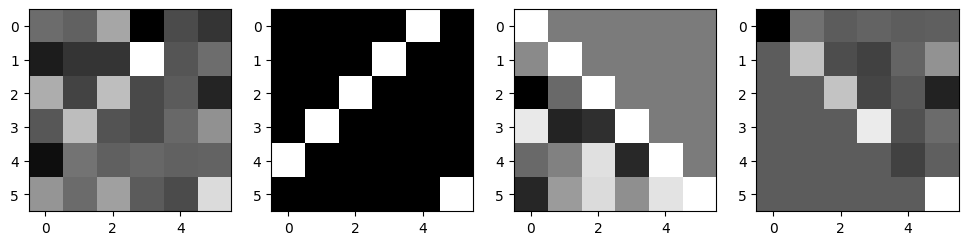

In [14]:
A = np.random.randn(6,6)
P = np.array([ [0,0,0,1],[1,0,0,0],[0,0,1,0],[0,1,0,0] ])

Pt,L,U = scipy.linalg.lu(A)

fig,ax = plt.subplots(1,4,figsize=(12,8))
ax[0].imshow(A,'gray')b
ax[1].imshow(Pt,'gray')
ax[2].imshow(L,'gray')
ax[3].imshow(U,'gray')

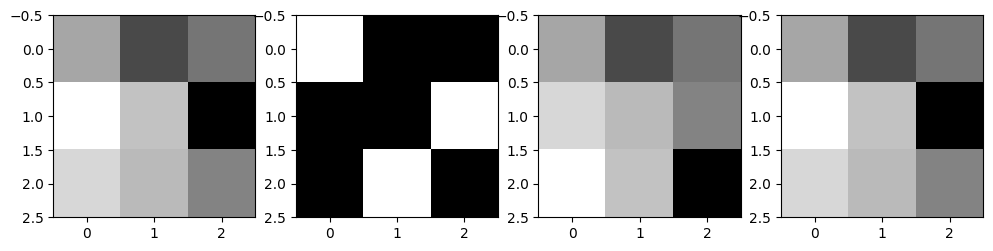

In [17]:
A = np.random.randn(3,3)
P = np.array([ [1,0,0],[0,0,1],[0,1,0] ])
F = P@A
fig,ax = plt.subplots(1,4,figsize=(12,8))
ax[0].imshow(A,'gray')
ax[1].imshow(P,'gray')
ax[2].imshow(F,'gray')
ax[3].imshow(P.T@F,'gray')